<a href="https://colab.research.google.com/github/josephhk1997-commits/Physics/blob/main/PHSX216_Knudsen_Joseph_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

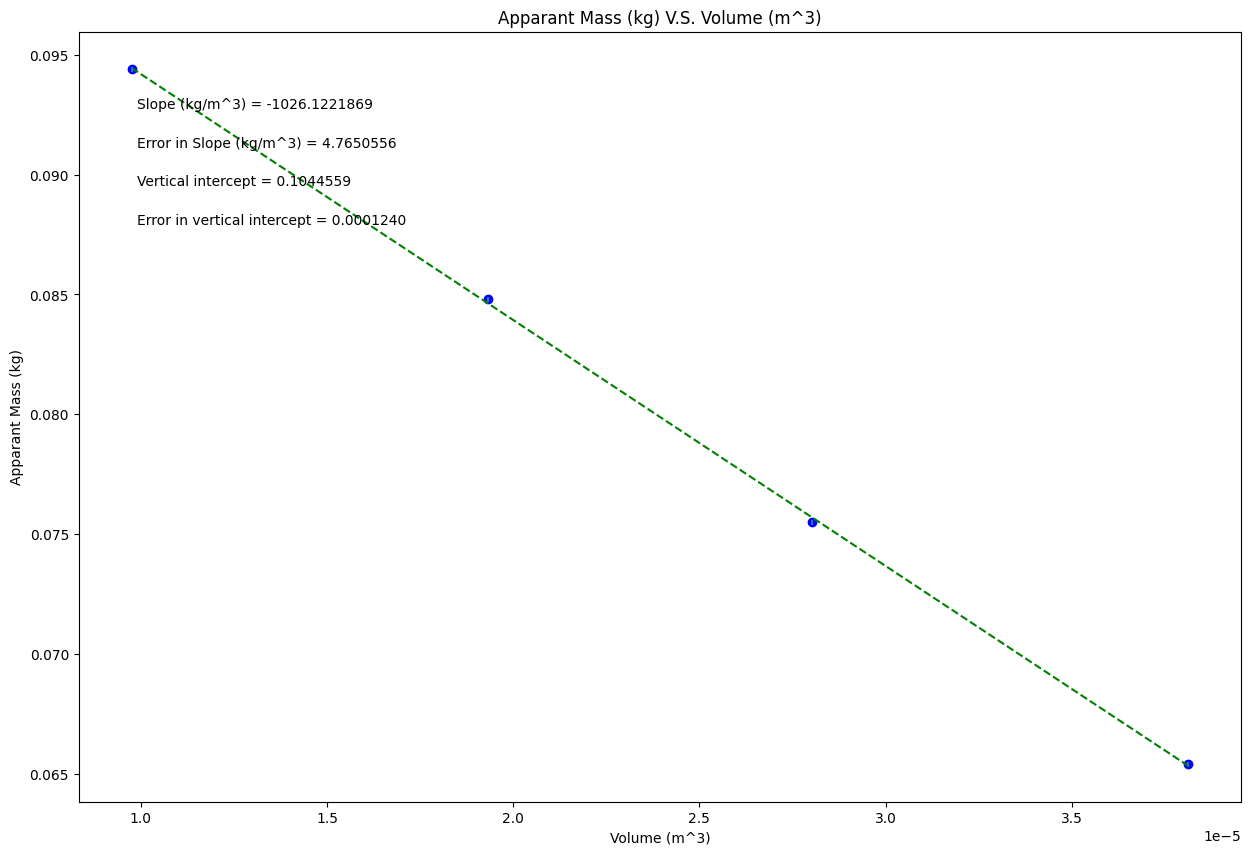

In [2]:
#PHSX 216 & 218 plotting code
#Brianna Beller
#Updated September 2023

#import packages and libraries, assign shortcut names
%matplotlib inline
from __future__ import division #only used if running python 2
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------#
#----------UPDATE THIS SECTION!!!----------

#DATA TO BE PLOTTED
#UPDATE THE VARIABLE NAMES & NUMBERS (LEAVE BRACKETS/PARENTHESES AS IS)
#variable names should start with a letter and must contain only letters, numbers, and underscores


xvariable_changeme = np.array([0.000009754118973, 0.000019330890328, 0.000028020923594, 0.000038129737802])

yvariable_changeme = np.array([0.0944,0.0848,0.0755,0.0654])

err_yvariable_changeme = np.array([0.0001,0.0001,0.0001,0.0001])



#Re-assign variables as x, y, dy so that the remaining plotting code may remain generic
#UPDATE VARIABLE NAMES (ON RHS OF EACH EQUAL SIGN) TO MATCH VARIABLE NAMES FOR DATA ABOVE

x = xvariable_changeme             #this should be the array you want to plot on the x axis
y = yvariable_changeme             #this should be the array you want to plot on the y axis
dy = err_yvariable_changeme        #this should be your error in y array


#UPDATE EACH OF THESE 4 STRINGS FOR YOUR PLOT LABELS AS YOU WANT THEM TO APPEAR

plot_title= 'Apparant Mass (kg) V.S. Volume (m^3)'
x_label= 'Volume (m^3)'
y_label= 'Apparant Mass (kg)'
slope_units= 'kg/m^3'

#UPDATE ANNOTATION PLACEMENT SO IT'S OUT OF WAY OF PLOTTED DATA AND BEST FIT LINE
#integer from 1 to 4, top R corner is 1 (counter-clockwise from there)

annotation_placement=2


#-----------------------------------------------------------------------#
#-----DON'T NEED TO CHANGE ANYTHING BEYOND THIS POINT!!!-----


#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

D=Delta(x, dy)

dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" using linear least squares fitting
#(value close to number of plotted points indicates good fit)
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N

N = LLSFD2(x,y,dy)

#assign annotation positions based on annotation_placement value
if annotation_placement==2 or annotation_placement==3:
    xpos=0.05
elif annotation_placement==1 or annotation_placement==4:
    xpos=0.75

if annotation_placement==1 or annotation_placement==2:
    ypos=[.9,.85,.8,.75]
elif annotation_placement==3 or annotation_placement==4:
    ypos=[.2,.15,.1,.05]

#-----------------------------------------------------------------------#
#Don't need to change anything in this section!

#Plot data on graph. Plot error bars and place values for slope,
#error in slope, and vertical intercept (plus error) on the plot using "annotate"

plt.figure(figsize=(15,10))

plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)

plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars

plt.annotate('Slope ({}) = {value:.{digits}f}'.format(slope_units,value=m, digits=7),
             (xpos, ypos[0]), xycoords='axes fraction')

plt.annotate('Error in Slope ({}) = {value:.{digits}f}'.format(slope_units,value=dm, digits=7),
             (xpos, ypos[1]), xycoords='axes fraction')

plt.annotate('Vertical intercept = {value:.{digits}f}'.format(value=b, digits=7),
             (xpos, ypos[2]), xycoords='axes fraction')

plt.annotate('Error in vertical intercept = {value:.{digits}f}'.format(value=db, digits=7),
             (xpos, ypos[3]), xycoords='axes fraction')

plt.show()